In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import utils_data as u

In [2]:
df = pd.read_parquet('steel-dataset.parquet')

In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled_ = pd.DataFrame(df_scaled, columns=df.columns)
y = df_scaled_['Usage_kWh']
X = df_scaled_.drop(['Usage_kWh'], axis=1)

In [4]:
from pathlib import Path

dataset_filename = Path('./steel_industry_energy_consumption_clean_features_importances.parquet')
if dataset_filename.exists():
    df_features_importances = pd.read_parquet(dataset_filename)
else:
    data = u.DataFeaturesImportances(X, y)
    df_features_importances = data.get_feature_importance_matrix()
    df_features_importances.to_parquet('steel_industry_energy_consumption_clean_features_importances.parquet')

In [5]:
df_features_importances.sort_values(by=['RF Permutation','XGBoost','Random Forest', 'Lasso'], ascending=False, inplace=True)

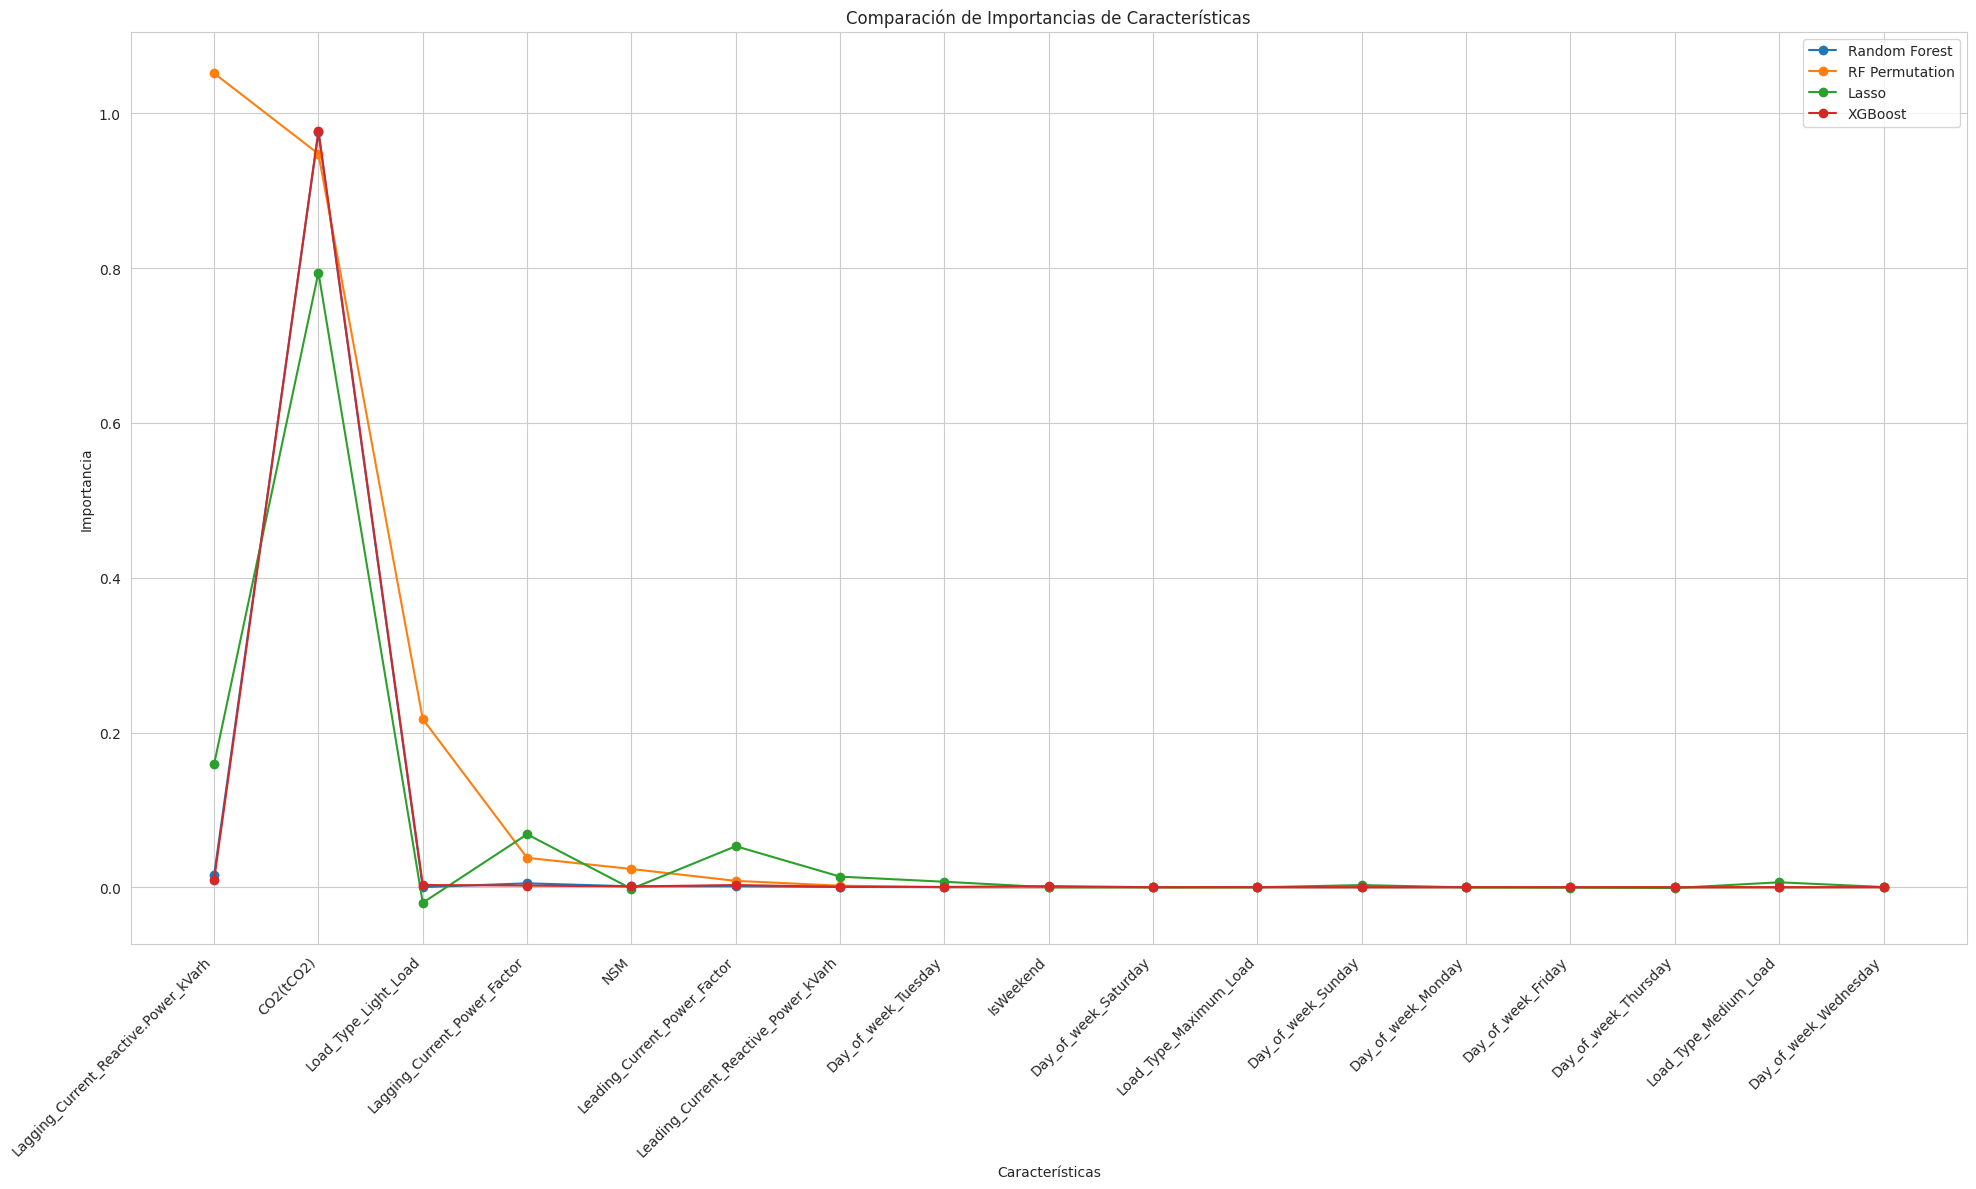

In [6]:
# Configuración de la gráfica
plt.figure(figsize=(20, 12))

# Iterar sobre las columnas excepto 'Feature'
for column in df_features_importances.columns[1:]:
    plt.plot(df_features_importances['Feature'], df_features_importances[column], marker='o', label=column)

# Configuración del gráfico
plt.title('Comparación de Importancias de Características')
plt.xlabel('Características')
plt.ylabel('Importancia')
plt.xticks(rotation=45, ha='right')

# Ajustar el alcance del eje y y los ticks
#plt.ylim(-1, 2)
#plt.yticks(np.arange(-1, 1, 0.5))

plt.legend()
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [8]:
df_features_importances.sort_values(by=['RF Permutation','XGBoost','Random Forest', 'Lasso'], ascending=True )

,Feature,Random Forest,RF Permutation,Lasso,XGBoost
13,Day_of_week_Wednesday,0.000024,-4.235588e-06,0.000375,0.000272
16,Load_Type_Medium_Load,0.000030,-4.031896e-06,0.006448,0.000095
11,Day_of_week_Thursday,0.000024,-1.081231e-06,-0.000945,0.000082
7,Day_of_week_Friday,0.000021,5.306061e-07,-0.000284,0.000078
8,Day_of_week_Monday,0.000024,1.737868e-06,-0.000100,0.000187
10,Day_of_week_Sunday,0.000011,1.097931e-05,0.002885,0.000079
15,Load_Type_Maximum_Load,0.000028,1.862087e-05,0.000000,0.000226
9,Day_of_week_Saturday,0.000016,2.574465e-05,0.000000,0.000096
6,IsWeekend,0.000121,1.094869e-04,0.000000,0.001484
12,Day_of_week_Tuesday,0.000098,1.101838e-04,0.007150,0.000470


## Los campos "Day_of_week" y "WeekStatus" no aportan información relevante al modelo. Podrían ser eliminados.

### Data para trabajar permanece sin cambios, solo sin campo "date" y los campos con valores categóricos con OHE

In [9]:
df = pd.read_parquet('steel-dataset.parquet')

In [10]:
df

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,IsWeekend,Day_of_week_Friday,Day_of_week_Monday,Day_of_week_Saturday,Day_of_week_Sunday,Day_of_week_Thursday,Day_of_week_Tuesday,Day_of_week_Wednesday,Load_Type_Light_Load,Load_Type_Maximum_Load,Load_Type_Medium_Load
0,3.17,2.95,0.00,0.0,73.21,100.00,900,False,False,True,False,False,False,False,False,True,False,False
1,4.00,4.46,0.00,0.0,66.77,100.00,1800,False,False,True,False,False,False,False,False,True,False,False
2,3.24,3.28,0.00,0.0,70.28,100.00,2700,False,False,True,False,False,False,False,False,True,False,False
3,3.31,3.56,0.00,0.0,68.09,100.00,3600,False,False,True,False,False,False,False,False,True,False,False
4,3.82,4.50,0.00,0.0,64.72,100.00,4500,False,False,True,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35035,3.85,4.86,0.00,0.0,62.10,100.00,82800,False,False,True,False,False,False,False,False,True,False,False
35036,3.74,3.74,0.00,0.0,70.71,100.00,83700,False,False,True,False,False,False,False,False,True,False,False
35037,3.78,3.17,0.07,0.0,76.62,99.98,84600,False,False,True,False,False,False,False,False,True,False,False
35038,3.78,3.06,0.11,0.0,77.72,99.96,85500,False,False,True,False,False,False,False,False,True,False,False
